# 1. Tổng quan bài toán

Trong dự án này, chúng ta sẽ dự đoán liệu ngày mai trời có mưa hay không bằng cách đào tạo mô hình phân loại nhị phân. Dự đoán thời tiết là một trong những ứng dụng chính của các mô hình máy học do việc phân tích và giải các phương trình toán học cụ thể rất phức tạp và hầu như không thể dự đoán được với các điều kiện cho trước. Do đó đòi hỏi phải có các mô hình máy học để có thể đưa ra được dự đoán tốt nhất có thể dựa trên các dữ liệu hiện có.

Bộ dữ liệu bao gồm nhiệt độ tối thiểu và tối đa hàng ngày, lượng mưa, cấp gió giật mạnh nhất, chỉ số hơi và nắng, cùng với các giá trị nhiệt độ, độ ẩm, gió, mây và áp suất tại thời điểm 9 giờ sáng và 3 giờ chiều. Thông tin rõ hơn về bộ dữ liệu này học viên có thể xem tại [đây](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

| Thực tế | Dự đoán |  |
| --- | --- | --- |
| Có | Có | TP |
| Không | Có | FP |
| Có | Không | FN |
| Không | Không | TN |
| Có | Có | TP |
| Có | Có | TP |
| Không | Không | TN |
| Có | Không | FN |

## 1.1 Load các package cần thiết

- Bước đầu tiên trong việc xây dựng mô hình là load các thư viện cần thiết.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # tắt cảnh báo

%matplotlib inline

## 1.2 Load tập dữ liệu
- Bước tiếp theo là load tập dữ liệu

In [ ]:
df = pd.read_csv('weatherAUS.csv')

# 2. Khai phá dữ liệu
- Bây giờ đến lúc khám phá dữ liệu để hiểu rõ hơn về nó

## 2.1 Tổng quan dữ liệu

In [ ]:
df.shape

(142193, 24)

- Có 142193 mẫu dữ liệu (dòng) và 24 đặc trưng ( cột) trong tập dữ liệu

- in ra một vài dữ liệu

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


- in ra tên của các đặc trưng


In [ ]:
col_names = df.columns.to_list() # lấy tên các cột gán vào col_names

col_names

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

- loại bỏ đặc trưng RISK_MM vì nó ảnh hưởng đến độ chính xác của mô hình chúng ta xây dựng

In [ ]:
df.drop(['RISK_MM'], axis = 1 , inplace = True)
# axis =1 xóa theo cột
# inplace = True là xóa vĩnh viễn ở df thay vì tạo 1 bản sao

- Xem tóm tắt đặc điểm về tập dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Bình luận: **
- Tập dữ liệu chứa hỗn hợp các biến hạng mục (object) và biến giá trị số (float64)
- Có giá trị bị thiếu trong tập dữ liệu

- Xem các thuộc tính thống kê của tập dữ liệu


In [ ]:
df.describe(include = ['float'])

# hàm describe sử dụng để tạo báo cáo thống kê mô tả
# include : đối số cho phép chỉ định loại dữ liệu muốn báo cáo thống kê mô tả vd:'number' (default), 'object', 'datetime' và 'timedelta'
# percentiles: chỉ định các phân vị bạn muốn tính toán vd: percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
# exclude : loại trừ kiểu dữ liệu không muốn tính toán trong báo cáo vd: 'number' (default), 'object', 'datetime' và 'timedelta'
# datetime_is_numeric: (default = False) xác định có coi ngày tháng là kiểu dữ liệu số để tính toán không
# include_index : Nếu đặt True thì báo cáo sẽ thống kê cả cột index nếu nó là số

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
df.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


## 2.2 Phân tích đơn biến
Do đặc trưng chúng ta muốn dự đoán là RainTomorrow nên chúng ta sẽ tiến hành phân tích kỹ hơn về đặc trưng này

- kiểm tra giá trị thiếu

In [ ]:
df['RainTomorrow'].isnull().sum()

0

- kiểm tra số lượng nhãn của đặc trưng

In [ ]:
df['RainTomorrow'].unique().size

# unique() : lấy các giá trị duy nhất từ cột trong df , trả về 1 mảng
# size : thuộc tính size lấy số lượng phần tử mảng

2

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

- Xem phân phối tần suất các giá trị

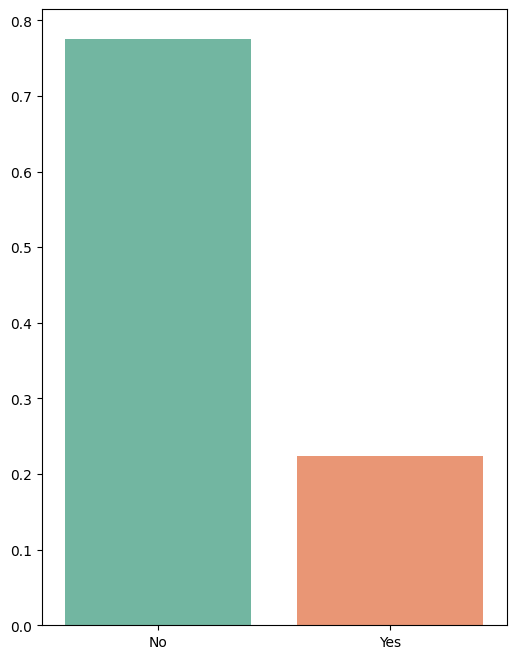

In [ ]:

value_counts= df['RainTomorrow'].value_counts()/len(df)
# tính tỉ lệ các giá trị trong cột 'RainTomorrow'

f,ax = plt.subplots(figsize = (6,8))
# tạo subplots với kích thước 6x8

ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')
plt.show()
# vẽ biểu đồ sử dụng seaborn với cột x là giá trị yes, no trong cột, trục y thể hiện tương ứng từng giá trị
# palette = 'Set2'  : màu sắc cột được chọn từ Set2

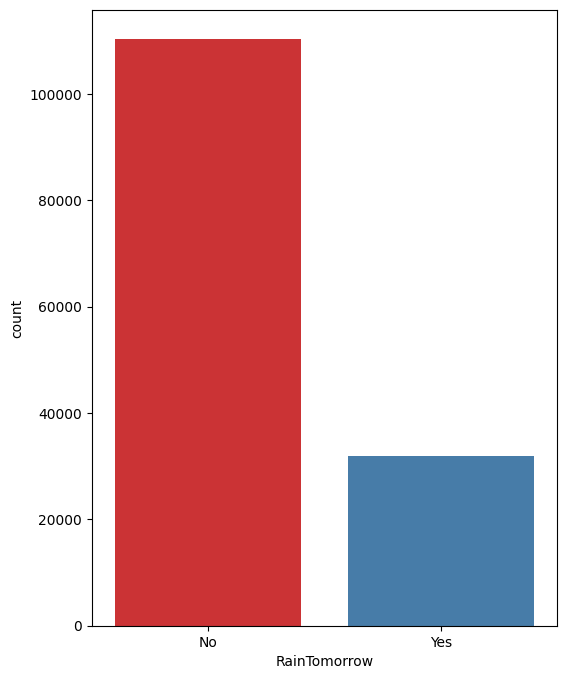

In [ ]:
df['RainTomorrow'].value_counts()/len(df)
# tính tỉ lệ các giá trị trong cột 'RainTomorrow'

f,ax = plt.subplots(figsize = (6,8))
# tạo subplots với kích thước 6x8

ax = sns.countplot(x='RainTomorrow' ,data = df, palette='Set1', )
plt.show()

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

**Kết quả của phân tích đơn biến**
- Số lượng nhãn trong biến RainTomorrow là 2
- Hai giá trị 'Yes' , 'No'
- Tỉ lệ xuất hiện : 'Yes' : 22,42% (110316 giá trị) và 'No' : 77,58% (31877 giá trị)

## 2.3 Phân tích song biến
- phân tích sâu hơn về 2 loại biến trong mô hình : biến hạng mục (object) và biến giá trị số

### 2.3.1 khám phá các biến hạng mục

- tìm các biến hạng mục

In [ ]:
categorical = [var for var in df.columns.to_list() if df[var].dtype == 'O' ]

print(f'Có {len(categorical)} biến hạng mục')
print(f'Các biến hạng mục đó là : ', categorical)


Có 7 biến hạng mục
Các biến hạng mục đó là :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**Tóm tắt biến hạng mục**
- Có 1 biến ngày tháng là "Date"
- Có 6 biến hạng mục là : Location, WindGustDir, WindDir9am, WindDir3pm, RainToday và RainTomorrow
- Có 2 biến nhị phân là: RainToday và RainTomorrow
- RainTomorrow là biến mục tiêu

- Kiếm tra các giá trị bị thiếu

In [ ]:
cat1 = [var for var in categorical if df[var].isnull().sum() != 0]
# tìm những cột có giá trị bị thiếu gán vào cat1

print(df[cat1].isnull().sum())


WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


- Số lượng nhãn trong từng biến hạng mục

In [ ]:
for var in categorical:
  print(var, 'chứa', len(df[var].unique()), 'nhãn')

Date chứa 3436 nhãn
Location chứa 49 nhãn
WindGustDir chứa 17 nhãn
WindDir9am chứa 17 nhãn
WindDir3pm chứa 17 nhãn
RainToday chứa 3 nhãn
RainTomorrow chứa 2 nhãn


- Đếm tần suất của các biến hạng mục(Do biến 'Date' chứa quá nhiều nhãn nên chúng ta vẽ bỏ qua biến này trong vẽ đồ thị tần suất)

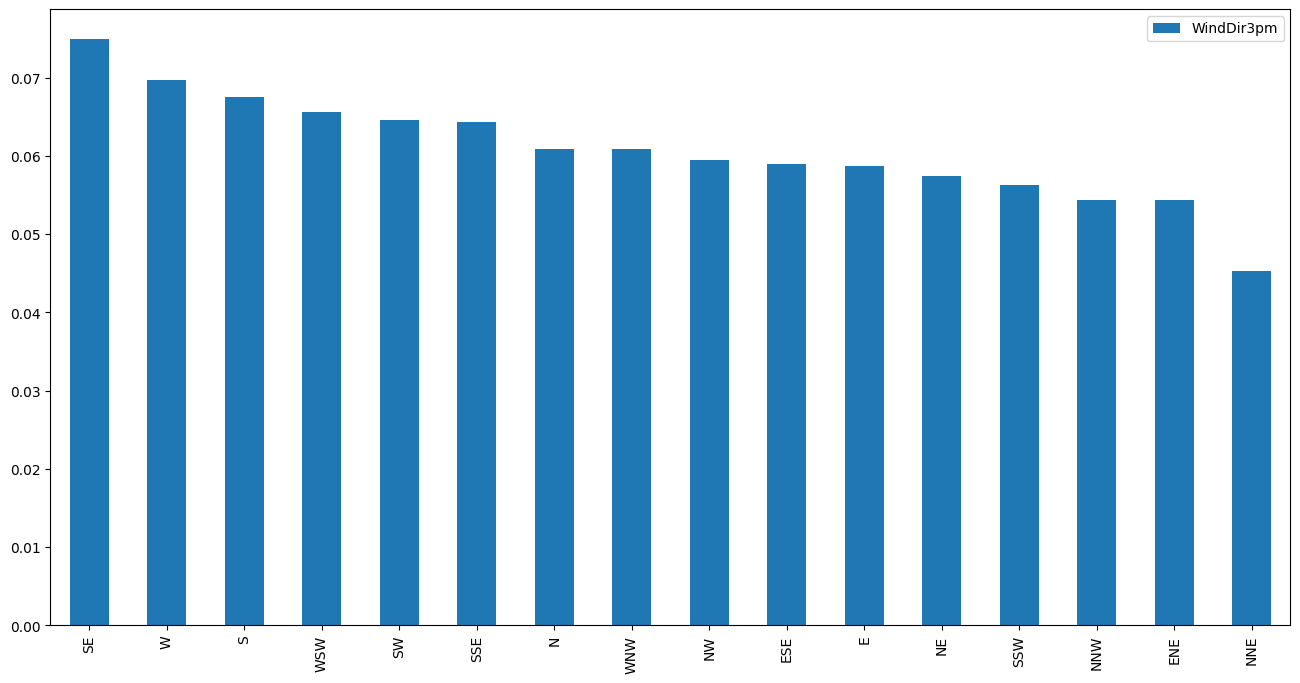

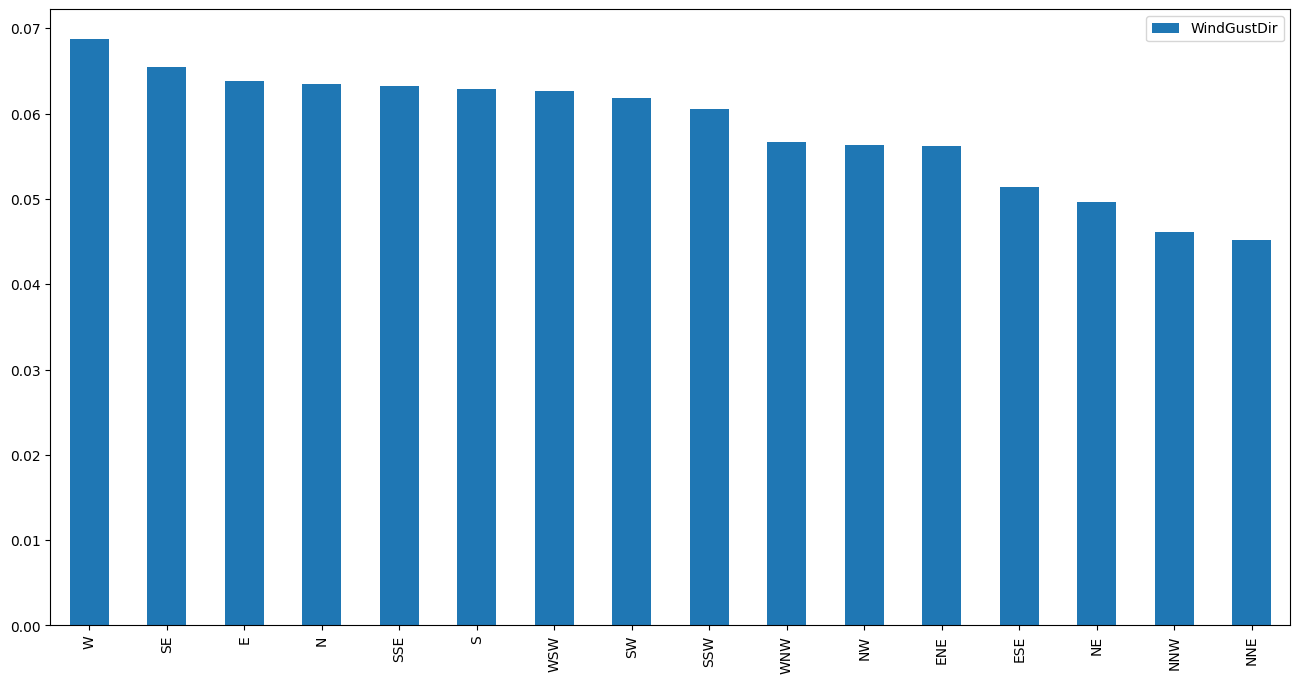

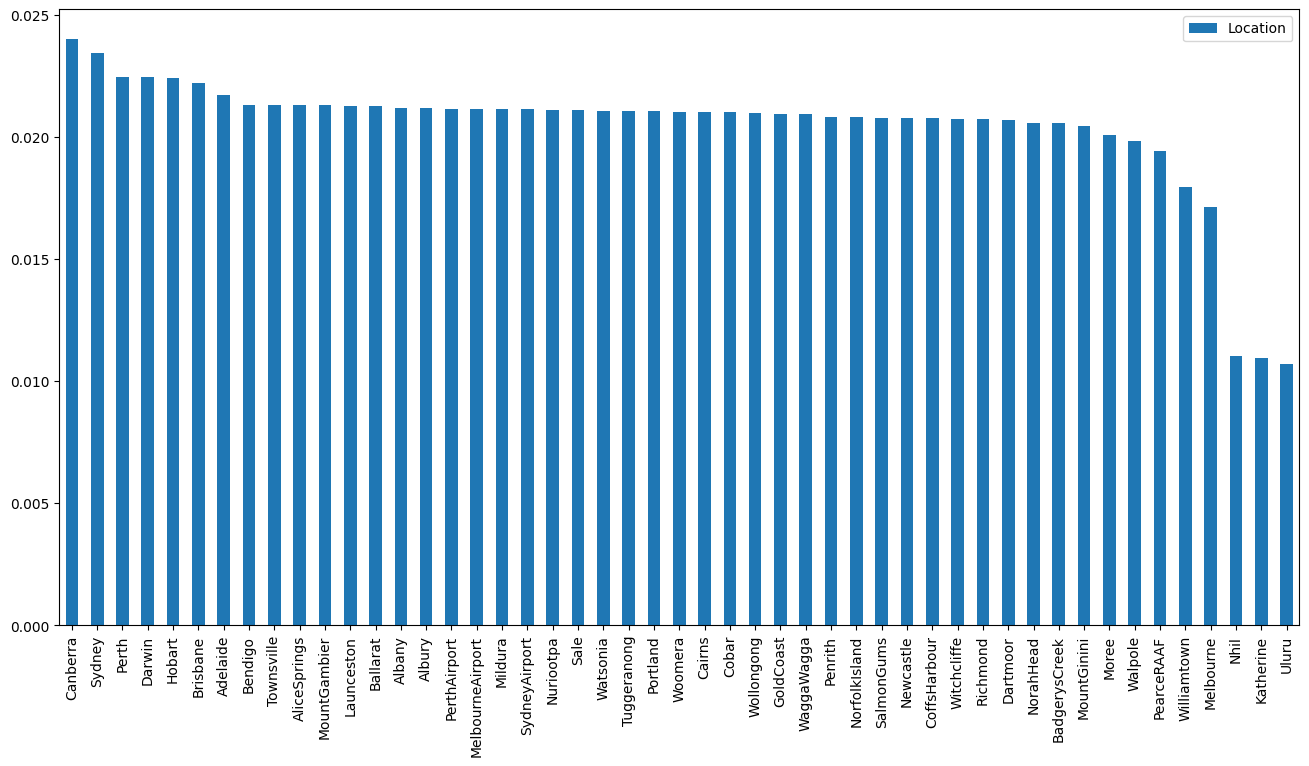

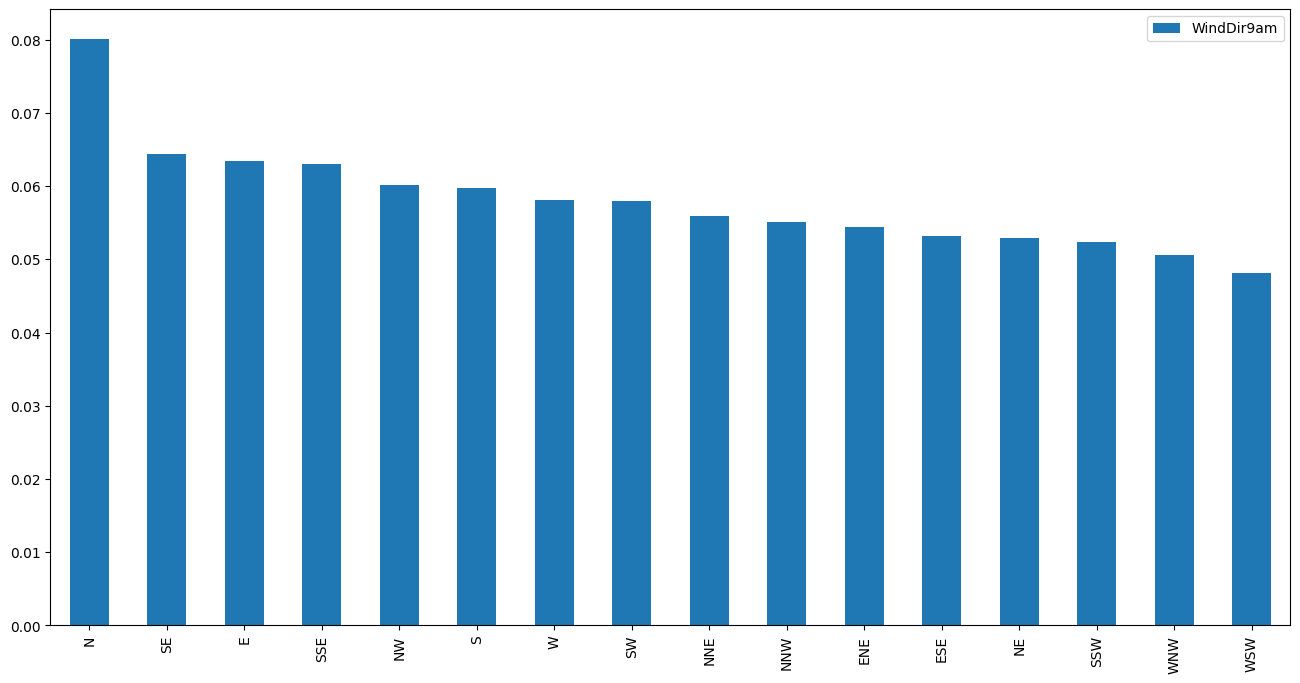

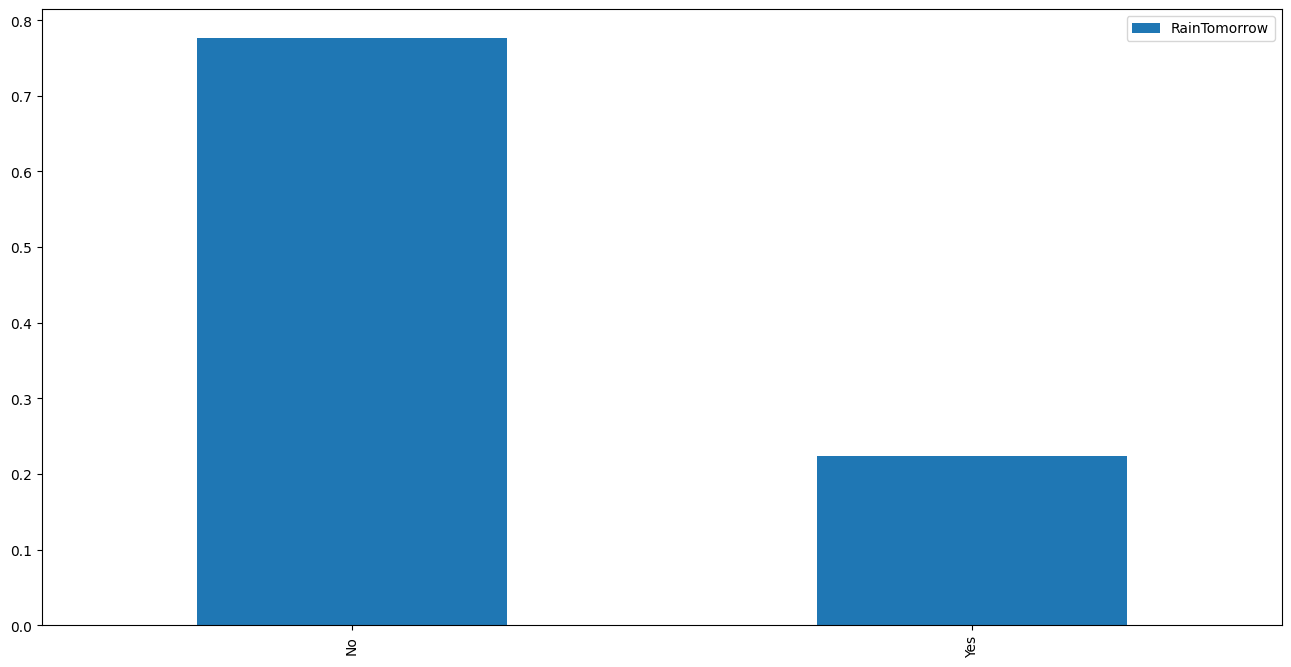

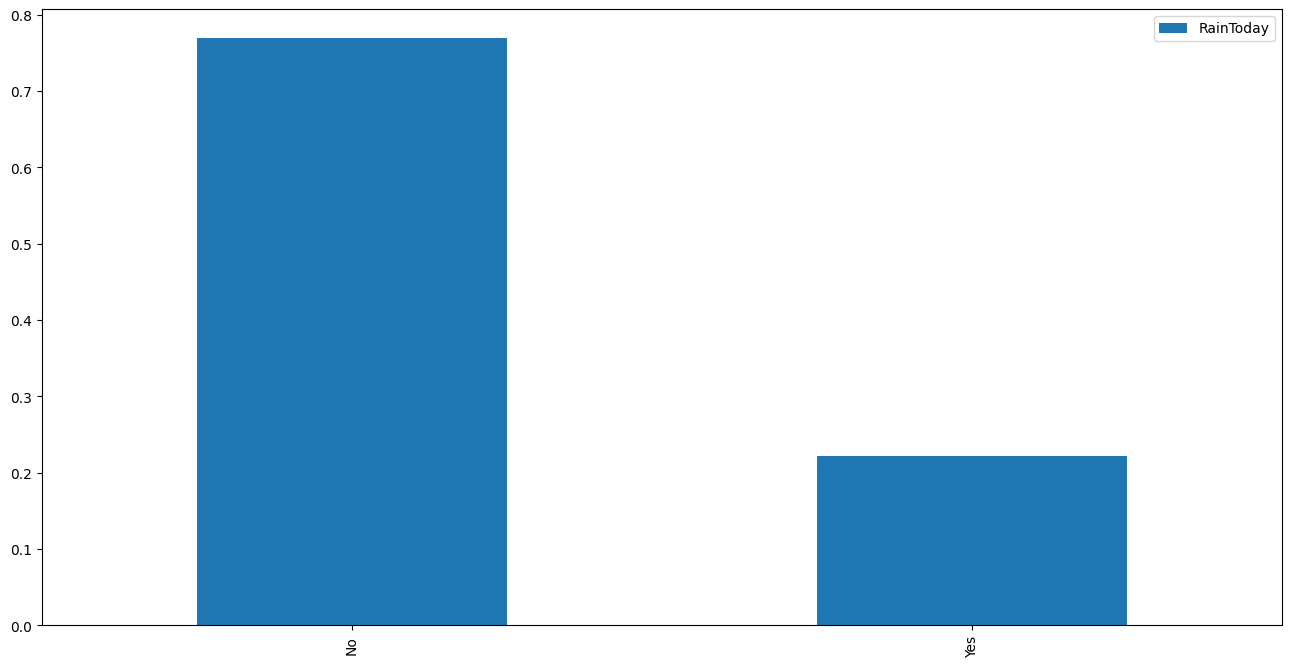

In [ ]:

for var in set(categorical) - {'Date'}:
  f,ax = plt.subplots(figsize=(16,8))
  # taoj subplot với kích thước 16x8
  data_plot = df[var].value_counts() / np.float(len(df[var]))
  # tính tỉ lệ các nhãn trong cột

  ax = data_plot.plot(kind = 'bar')
  ax.legend() # thêm chú thích
  plt.show()

###2.3.2 Khám phá giá trị các biến số

In [ ]:
numerical = [var for var in df.columns.to_list() if df[var].dtype != 'O']

print(f"Có {len(numerical)} biến giá trị số")
print(f"Các biến giá trị số đó là ", numerical)

Có 16 biến giá trị số
Các biến giá trị số đó là  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Tóm tắt giá trị các biến số**

- Có 16 giá trị biến số
- Chúng là MinTemp, MaxTemp, Lượng mưa, Bốc hơi, Ánh nắng mặt trời, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp 9am và Temp3pm.
- Tất cả các biến giá trị số đều thuộc các giá trị liên tục (giá trị liên tục là giá trị bất kì trong một khoảng nhất định)

- kiểm tra các giá trị bị thiếu

In [ ]:
num1 = [var for var in numerical if df[var].isnull().sum() != 0]

print(df[num1].isnull().sum())

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64


In [ ]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


- Tìm các dữ liệu ngoại lai

In [ ]:
for var in numerical:
  IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
  Lower_fence = df[var].quantile(0.25) - (IQR * 3)
  Upper_fence = df[var].quantile(0.75) + (IQR * 3)
  print('Dữ liệu ngoại lai của biến', var, 'là các giá trị < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Dữ liệu ngoại lai của biến MinTemp là các giá trị < -20.0 hoặc > 44.400000000000006
Dữ liệu ngoại lai của biến MaxTemp là các giá trị < -13.000000000000004 hoặc > 59.1
Dữ liệu ngoại lai của biến Rainfall là các giá trị < -2.4000000000000004 hoặc > 3.2
Dữ liệu ngoại lai của biến Evaporation là các giá trị < -11.800000000000002 hoặc > 21.800000000000004
Dữ liệu ngoại lai của biến Sunshine là các giá trị < -12.199999999999998 hoặc > 27.699999999999996
Dữ liệu ngoại lai của biến WindGustSpeed là các giá trị < -20.0 hoặc > 99.0
Dữ liệu ngoại lai của biến WindSpeed9am là các giá trị < -29.0 hoặc > 55.0
Dữ liệu ngoại lai của biến WindSpeed3pm là các giá trị < -20.0 hoặc > 57.0
Dữ liệu ngoại lai của biến Humidity9am là các giá trị < -21.0 hoặc > 161.0
Dữ liệu ngoại lai của biến Humidity3pm là các giá trị < -50.0 hoặc > 153.0
Dữ liệu ngoại lai của biến Pressure9am là các giá trị < 984.4 hoặc > 1050.9
Dữ liệu ngoại lai của biến Pressure3pm là các giá trị < 981.5999999999999 hoặc > 1048.800000000

## 2.4 Phân tích đa biến

- Vẽ biểu đồ nhiệt heatmap

In [ ]:
correlation = df.corr()

# hàm corr() dùng để tính sự tương quan giữa các cột

In [ ]:
correlation

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


- Vẽ biểu đồ nhiệt

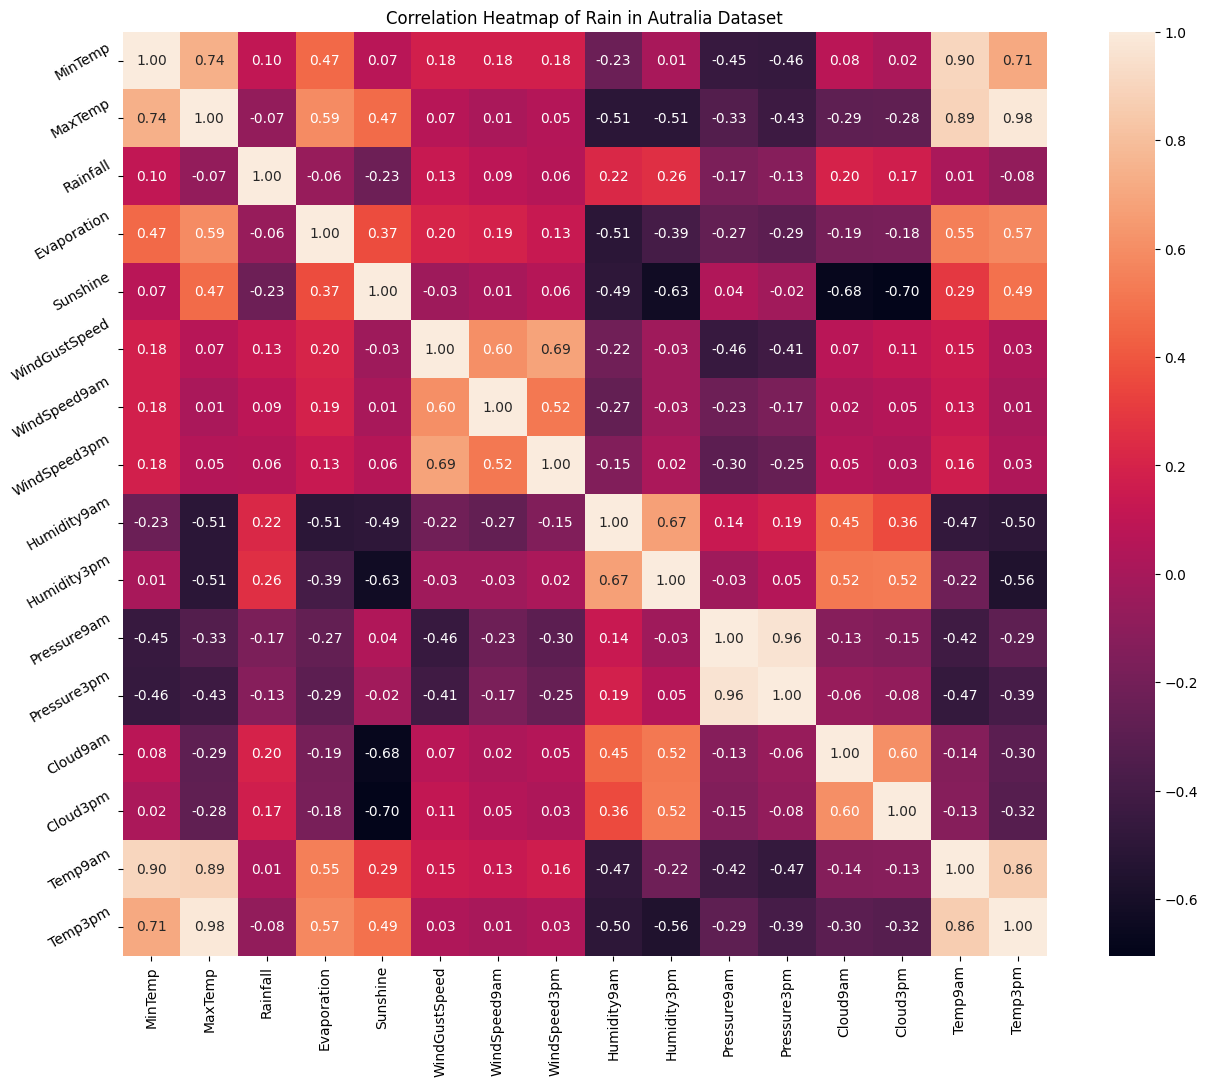

In [ ]:
plt.figure(figsize = (16,12))
plt.title('Correlation Heatmap of Rain in Autralia Dataset')

ax = sns.heatmap(correlation, square = True, annot = True, fmt = '.2f', linecolor = 'white')
# vẽ heatmap, square = True để đảm bảo các ô vuông , annot = True để thể hiện giá trị tương quan trên biểu đồ, fmt = '.2f' chỉ hiển thị 2 số thập phân
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
# xoay nhãn trục x 90 độ
ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)
# xoay nhãn trục y 30 độ

plt.show()

Diễn dịch: Từ bản đồ nhiệt tương quan trên, chúng ta có thể kết luận rằng:

- Biến MinTemp và MaxTemp có tương quan thuận rất cao (hệ số tương quan = 0.74).

- Các biến MinTemp và Temp3pm cũng có tương quan thuận cao (hệ số tương quan = 0.71).

- Các biến MinTemp và Temp9am có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.90).

- Các biến MaxTemp và Temp9am có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.89).

- Các biến MaxTemp và Temp3pm cũng có tương quan thuận mạnh (hệ số tương quan = 0.98).

- Các biến WindGustSpeed và WindSpeed3pm có tương quan thuận rất cao (hệ số tương quan = 0.69).

- Các biến Pressure9am và Pressure3pm có mối tương quan thuận chặt chẽ với nhau (hệ số tương quan = 0.96).

- Các biến Temp9am và Temp3pm có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.86).

- Thể hiện rõ hơn mối quan hệ tương quan của các biến có mức độ tương quan mạnh

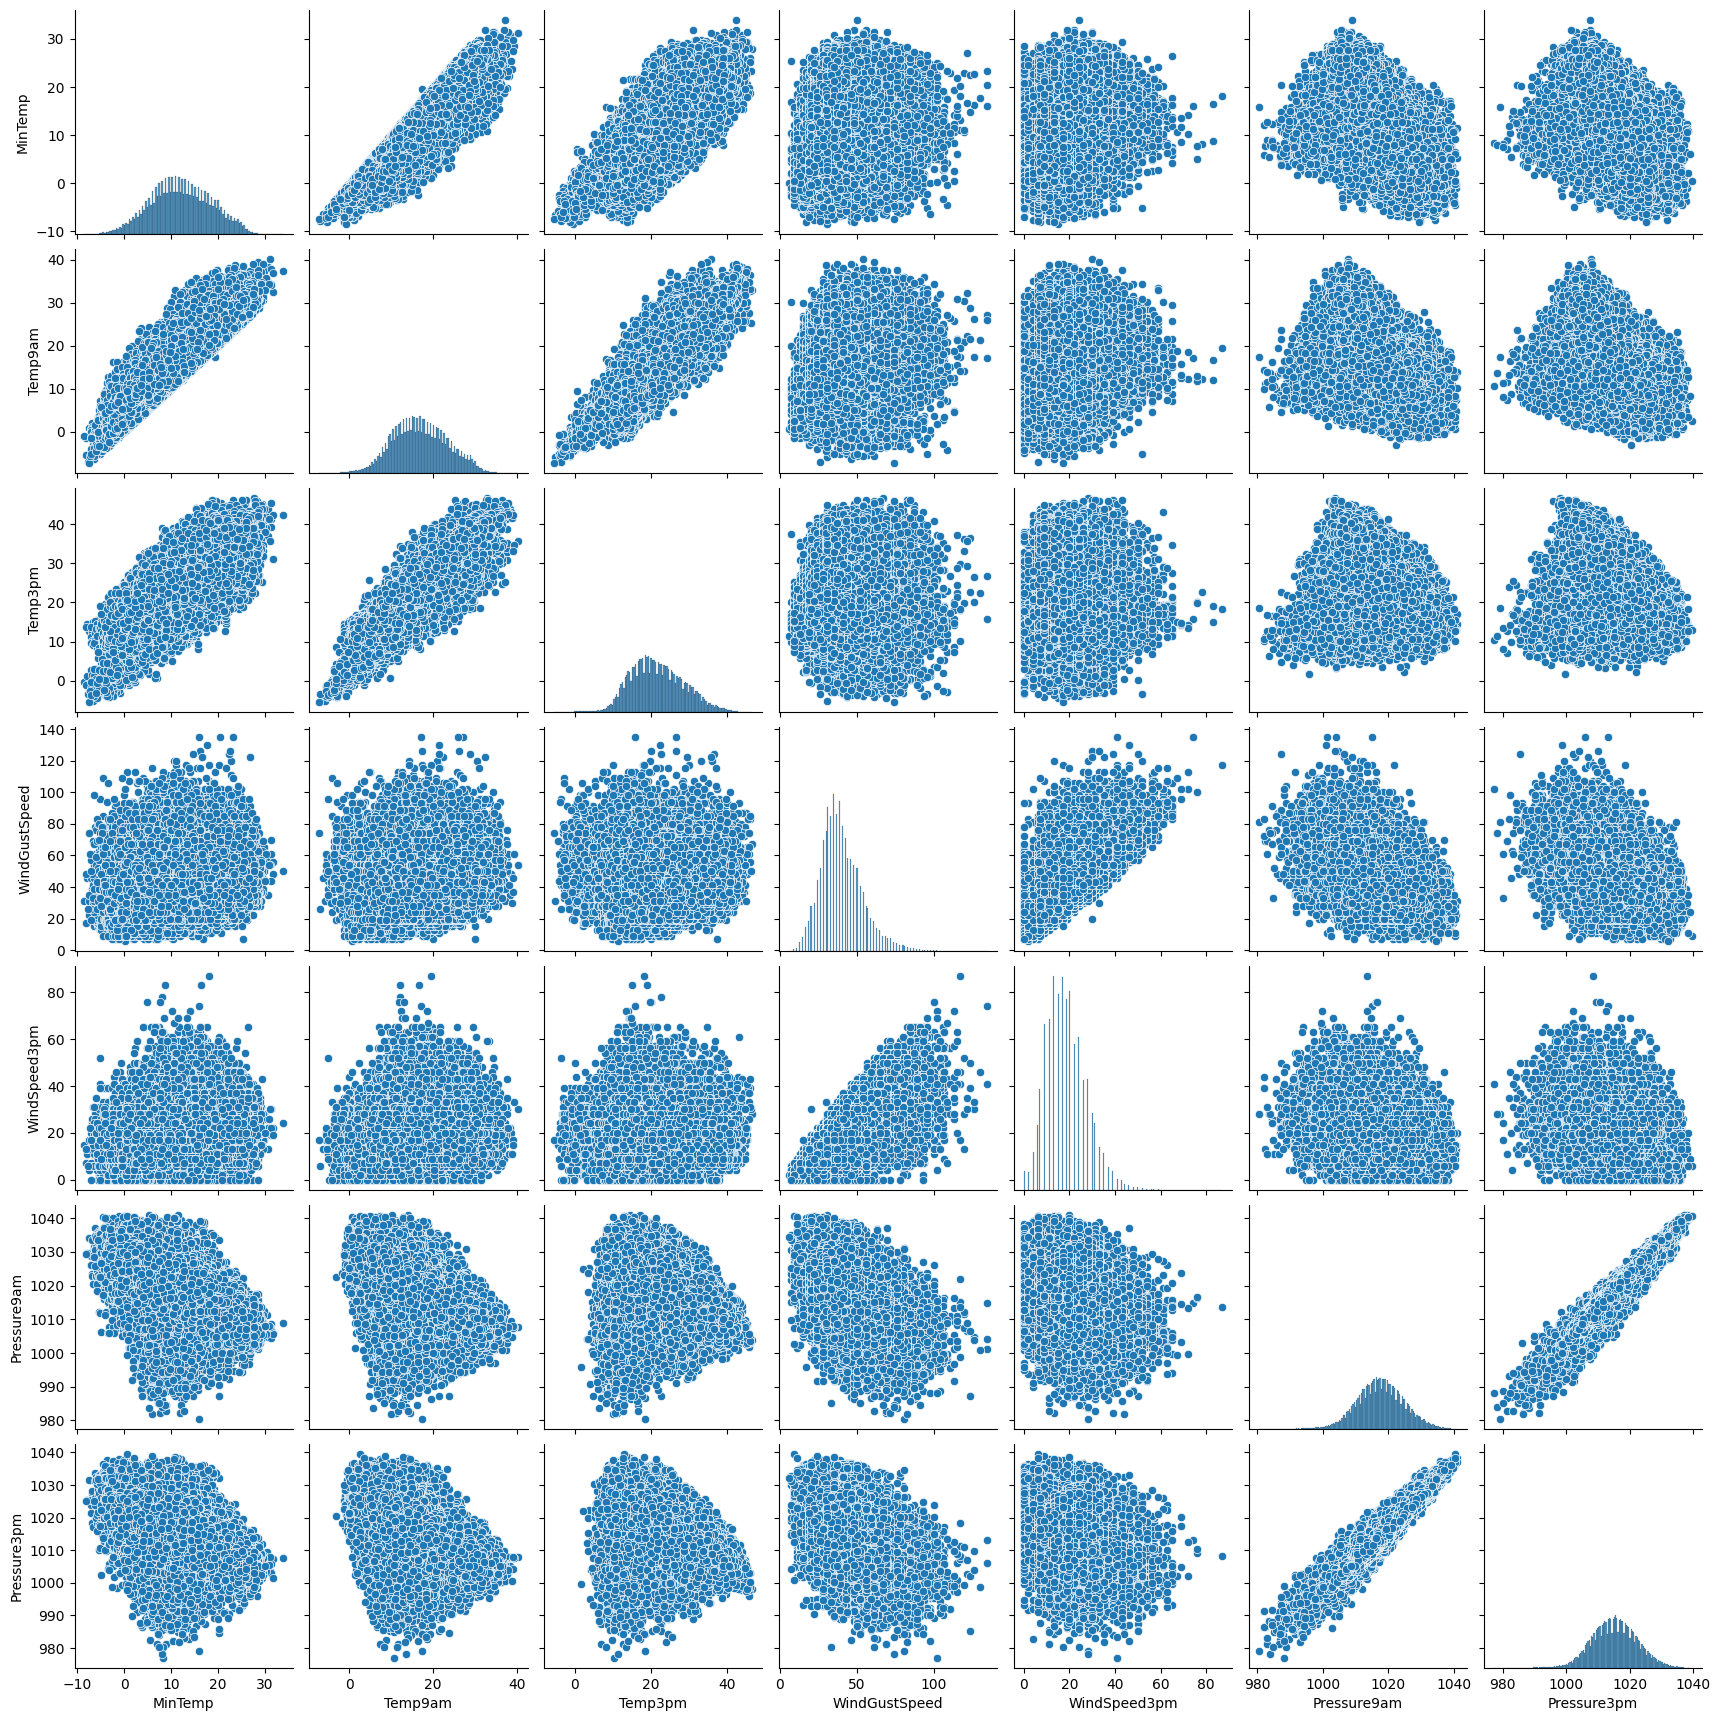

In [ ]:
num_var = ['MinTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

sns.pairplot(df[num_var], diag_kind = 'hist', palette = 'Rainbow' )

plt.show()

# 3.Tiền xử lí dữ liệu

Chúng ta sẽ tiến hành làm sạch dữ liệu trước khi đưa vào mô hình:
1. Điền giá trị vào các đặc trung bị khuyết
2. Loại bỏ các giá trị ngoại lai
3. Mã hóa các đặc trưng tùy vào loại biến

- Chuẩn bị tập dữ liệu

In [ ]:
X = df.drop(['RainTomorrow'], axis = 1)

y = df['RainTomorrow']

- Chia biến hạng mục và biến giá trị số

In [ ]:
categorical = [col for col in X.columns.to_list() if X[col].dtypes == 'O']
numerical = [col for col in X.columns.to_list() if X[col].dtypes != 'O']

- chia tập dữ liệu thành tập huấn luyện và tập kiểm tra

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [ ]:
X_train.shape, X_test.shape

((113754, 22), (28439, 22))

## 3.1 Xử lí đặc trưng bị khuyết
- Điền các giá trị bị khuyết tùy vào loại biến

### 3.1.1 Biến giá trị số

In [ ]:
# Điền các giá trị khuyết bằng giá trị median

for df1 in [X_train, X_test]:
  for col in numerical:
    col_median = X_train[col].median()
    df1[col].fillna(col_median, inplace = True)

-  kiểm tra lại tập dữ liệu còn giá trị bị khuyết

In [ ]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 3.1.2 Biến hạng mục

- Điền các giá trị khuyết bằng giá trị mode

In [ ]:
for df2 in [X_train, X_test]:
  for var in categorical:
    df2[var].fillna(X_train[var].mode()[0], inplace = True)

# hàm mode() trả về giá trị xuất hiện nhiều và có tần suất cao nhất

- kiểm tra lại liệu tập dữ liệu có còn giá trị khuyết

In [ ]:
X_train[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

## 3.2 Xử lý ngoại lại của biến giá trị số

Chúng ta đã thấy rằng các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm chứa các giá trị ngoại lai. Chúng ta sẽ giới hạn các giá trị tối đa và loại bỏ các giá trị ngoại lai khỏi các biến ở trên.


In [ ]:
def max_value(df3, variable, top):
  return np.where(df3[variable] > top , top , df3[variable])
  # hàm where thực hiện tìm kiếm có điều kiện, trả về các chỉ mục

for df3 in [X_train, X_test]:
  df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2 )
  df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8 )
  df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55 )
  df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57 )


In [ ]:
for var in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
  print(var, X_train[var].max(), X_test[var].max())

Rainfall 3.2 3.2
Evaporation 21.8 21.8
WindSpeed9am 55.0 55.0
WindSpeed3pm 57.0 57.0


In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


## 3.3 Mã hóa các biến hạng mục


- Mã hóa số nguyên cho biến mục tiêu

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 933.7 kB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
y_train


In [ ]:
# mã hóa biến mục tiêu

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

- Mã hóa nhị phân cho biến RainToday

In [ ]:
encoder = ce.BinaryEncoder(cols = ['RainToday'])

X_train_target = encoder.fit_transform(X_train)

X_test_target = encoder.transform(X_test)

In [ ]:
X_train_target.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
110803,2014-04-25,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,...,65.0,55.0,1013.9,1013.4,5.0,5.0,18.8,20.4,0,1
87289,2015-11-02,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,...,71.0,59.0,1016.9,1013.1,7.0,5.0,26.4,27.5,1,0
134949,2014-10-19,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,...,6.0,2.0,1018.1,1013.6,1.0,1.0,28.5,35.0,0,1
85553,2010-10-30,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,...,59.0,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4,0,1
16110,2012-11-08,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,...,72.0,53.0,1017.6,1015.2,5.0,8.0,22.2,27.0,0,1


- Chúng ta có thể thấy rằng hai biến bổ sung RainToday_0 và RainToday_1 được tạo từ biến RainToday.

- Mã hóa One-hot các biến hạng mục phụ thuộc

Cho tập train

In [ ]:
col_categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

X_train_categorical = pd.concat([X_train_target[['RainToday_0', 'RainToday_1']], pd.get_dummies(X_train[col_categorical])], axis = 1)

# hàm get_dummies biến đổi các biến hạng mục thành các biến giả định bằng cách tạo các cột mới cho mỗi giá trị ban đầu

In [ ]:
X_train_categorical.head()

,RainToday_0,RainToday_1,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
87289,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
134949,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85553,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16110,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Cho tập test

In [ ]:
X_test_categorical = pd.concat([X_test_target[['RainToday_0', 'RainToday_1']],
                                pd.get_dummies(X_test[col_categorical])], axis = 1)

In [ ]:
X_test_categorical.head()

,RainToday_0,RainToday_1,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
86232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57576,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
124071,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
117955,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
133468,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.4 Rời rạc hóa dữ liệu số

- Chúng ta sẽ rời rạc hóa dữ liệu giá trị số thành dữ liệu hạng mục

In [ ]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc = EqualFrequencyDiscretiser(q = 10, variables = numerical)

disc.fit(X_train[numerical])

EqualFrequencyDiscretiser(variables=['MinTemp', 'MaxTemp', 'Rainfall',
                                     'Evaporation', 'Sunshine', 'WindGustSpeed',
                                     'WindSpeed9am', 'WindSpeed3pm',
                                     'Humidity9am', 'Humidity3pm',
                                     'Pressure9am', 'Pressure3pm', 'Cloud9am',
                                     'Cloud3pm', 'Temp9am', 'Temp3pm'])

In [ ]:
disc.binner_dict_

{'MinTemp': [-inf, 4.0, 6.6, 8.5, 10.3, 12.0, 13.8, 15.7, 18.0, 20.8, inf],
 'MaxTemp': [-inf, 14.5, 17.0, 18.9, 20.7, 22.6, 24.7, 27.0, 29.6, 32.9, inf],
 'Rainfall': [-inf, 0.2, 1.6, inf],
 'Evaporation': [-inf, 2.0, 3.4, 4.8, 6.2, 8.2, inf],
 'Sunshine': [-inf, 3.7, 7.0, 8.5, 9.6, 11.1, inf],
 'WindGustSpeed': [-inf,
  24.0,
  30.0,
  33.0,
  35.0,
  39.0,
  41.0,
  44.0,
  50.0,
  57.0,
  inf],
 'WindSpeed9am': [-inf,
  4.0,
  7.0,
  9.0,
  11.0,
  13.0,
  15.0,
  19.0,
  20.0,
  26.0,
  inf],
 'WindSpeed3pm': [-inf,
  9.0,
  11.0,
  13.0,
  15.0,
  19.0,
  20.0,
  22.0,
  26.0,
  30.0,
  inf],
 'Humidity9am': [-inf,
  44.0,
  54.0,
  60.0,
  65.0,
  70.0,
  75.0,
  80.0,
  86.0,
  94.0,
  inf],
 'Humidity3pm': [-inf,
  23.0,
  33.0,
  41.0,
  47.0,
  52.0,
  57.0,
  62.0,
  69.0,
  79.0,
  inf],
 'Pressure9am': [-inf,
  1009.2,
  1012.3,
  1014.6,
  1016.6,
  1017.6,
  1018.6,
  1020.7,
  1023.0,
  1026.3,
  inf],
 'Pressure3pm': [-inf,
  1006.8,
  1009.8,
  1012.1,
  1014.2,
  10

In [ ]:
X_train_numerical = disc.transform(X_train[numerical])
X_test_numerical = disc.transform(X_test[numerical])

In [ ]:
X_train_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
110803,6,4,0,2,2,5,7,8,3,5,2,3,2,2,6,4
87289,9,7,2,3,1,2,1,4,5,6,4,3,3,2,9,7
134949,3,9,0,5,5,2,5,1,0,0,5,3,0,0,9,9
85553,8,8,0,5,4,4,8,4,2,5,2,2,1,1,9,8
16110,7,7,0,2,2,4,0,0,5,5,4,4,2,4,7,7


In [ ]:
X_test_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
86232,7,7,0,2,4,2,3,4,3,6,2,1,0,0,9,8
57576,2,0,1,0,2,7,6,6,6,5,1,3,2,2,1,0
124071,3,1,2,2,2,2,4,0,4,6,2,5,2,2,2,0
117955,6,9,0,4,5,5,2,4,0,0,6,6,0,0,8,9
133468,2,0,2,0,2,1,5,2,8,3,9,9,3,0,0,1


- Ghép 2 tập dữ liệu hạng mục và giá trị số sau khi đã xử lí

In [ ]:
train = pd.concat([X_train_numerical, X_train_categorical], axis=1)
test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

In [ ]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,6,4,0,2,2,5,7,8,3,5,...,0,0,1,0,0,0,0,0,0,0
87289,9,7,2,3,1,2,1,4,5,6,...,0,0,0,1,0,0,0,0,0,0
134949,3,9,0,5,5,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
85553,8,8,0,5,4,4,8,4,2,5,...,0,0,0,0,0,0,0,0,0,0
16110,7,7,0,2,2,4,0,0,5,5,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
86232,7,7,0,2,4,2,3,4,3,6,...,0,0,0,0,0,0,0,0,0,0
57576,2,0,1,0,2,7,6,6,6,5,...,0,0,1,0,0,0,0,0,0,0
124071,3,1,2,2,2,2,4,0,4,6,...,0,0,0,0,1,0,0,0,0,0
117955,6,9,0,4,5,5,2,4,0,0,...,0,0,0,0,0,0,1,0,0,0
133468,2,0,2,0,2,1,5,2,8,3,...,0,0,0,0,0,0,0,0,0,0


# 4. Lựa chọn đặc trưng

Ở bước này chúng ta sẽ thực hiện các phương pháp lựa chọn đặc trưng sau:

1. Loại các đặc trưng trùng.
2. Loại các đặc trưng quasi-constant.
3. Lựa chọn đặc trưng

  - Lựa chọn đặc trưng dựa trên chỉ số ROC-AUC.
  - Lựa chọn đặc trưng bằng cách tính hệ số feature importance bằng mô hình Random Forest.

Sau đó chúng ta sẽ so sánh 2 phương pháp ROC-AUC và Random Forest để xem phương pháp nào sẽ cho ra kết quả dự đoán tốt hơn.

Tuy nhiên vẫn còn các cách lựa chọn đặc trưng khác như sử dụng chỉ số MSE hay là các phương pháp đệ quy. Học viên nên thử nghiệm thêm các phương pháp khác ngoài 4 phương pháp kể trên để cho ra các kết quả tốt nhất có thể.

## 4.1 Loại các đặc trưng bị trùng
- Đầu tiên là chúng ta sẽ loại bỏ các đặc trưng  bị trùng

In [ ]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
  if i % 10 == 0:
    print(i)

  col_1 = train.columns[i]
  for col_2 in train.columns[i + 1:]:
    if train[col_2].equals(train[col_1]):
      duplicated_feat.append(col_2)


len(duplicated_feat)

0
10
20


0

In [ ]:
train.drop(labels = duplicated_feat, axis = 1, inplace = True)
test.drop(labels = duplicated_feat, axis =1 , inplace = True)

train.shape, test.shape

((113754, 115), (28439, 115))

## 4.2 Loại bỏ các đặc trưng Quasi-constant

 - Kế tiếp chúng ta sẽ loại các đặc trung Quasi-constant
 -Đặc trưng quasi-constant (quasi-constant feature) là các biến trong tập dữ liệu mà hầu hết các giá trị của chúng có mức độ biến đổi rất thấp hoặc không đổi gần như không đổi. Tức là, các giá trị của biến này chỉ thay đổi rất ít hoặc không thay đổi chút nào giữa các quan sát.

In [ ]:
quasi_constant_feat = []

for feature in train.columns:
  predominant = (train[feature].value_counts()/ np.float(len(train))).sort_values(ascending = False).values[0]

  if predominant > 0.998:
    quasi_constant_feat.append(feature)

train.drop(labels = quasi_constant_feat, axis = 1, inplace = True)
test.drop(labels = quasi_constant_feat, axis = 1, inplace = True)

train.shape, test.shape

((113754, 115), (28439, 115))

## 4.3 Lựa chọn đặc trưng bằng chỉ số ROC-AUC

ROC-AUC là một phương pháp tính toán hiệu suất của một mô hình phân loại theo các ngưỡng phân loại khác nhau. Giả sử với bài toán phân loại nhị phân (2 lớp) sử dụng hồi quy logistic (logistic regression), việc chọn các ngưỡng phân loại [0..1] khác nhau sẽ ảnh hưởng đến khả năng phân loại của mô hình và ta cần tính toán được mức độ ảnh hưởng của các ngưỡng. AUC là từ viết tắt của Area Under The Curve còn ROC viết tắt của Receiver Operating Characteristics. ROC là một đường cong biểu diễn xác suất và AUC biểu diễn mức độ phân loại của mô hình. ROC-AUC càng gần 1 thì kết quả dự đoán càng chính xác và xác suất để dự đoán đúng nhãn của một dữ liệu mẫu cũng sẽ càng cao. Do đó đặc trưng nào có chỉ số ROC-AUC càng cao thì càng cho thấy mức độ ảnh hưởng của đặc trưng đó trong việc đưa ra dự đoán của các mô hình máy học. Và chúng ta sẽ lựa chọn các đặc trưng này để mô hình của chúng ta vẫn có kết quả dự đoán chính xác mà không cần phải tốn quá nhiều tài nguyên máy tính.

- Như đã nói ở trên, chỉ số ROC-AUC càng gần 1 thì mô hình càng phân loại chính xác. ROC-AUC càng gần 0.5 thì hiệu suất phân loại càng tệ còn nếu gần 0 thì mô hình sẽ cho ra kết quả phân loại ngược với kết quả chúng ta mong muốn. Do vậy, chúng ta sẽ lựa chọn các đặc trưng có chỉ số ROC-AUC > 0.51 và loại bỏ các đặc trưng còn lại.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# xác định roc-auc cho mỗi đặc trưng

roc_values = []

for feature in train.columns:
  clf = DecisionTreeClassifier()
  clf.fit(train[feature].values.reshape(-1,1), y_train)

  y_scored = clf.predict_proba(test[feature].values.reshape(-1, 1))

  roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

print(roc_values[0:10])

[0.5634856648833344, 0.6110053654152788, 0.67765553549737, 0.5626548190523234, 0.6979726553820242, 0.6457139809421919, 0.561653573942804, 0.5590202934730732, 0.6806929630872777, 0.7924906246971252]


In [ ]:
roc_values = pd.Series(roc_values)
roc_values.index = train.columns

selected_features_roc = roc_values[roc_values > 0.51].index

selected_features_roc

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_0', 'RainToday_1', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_W',
       'WindDir9am_E', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_SE'],
      dtype='object')

## 4.4 Lựa chọn đặc trưng bằng mô hình Random Forest

Ở phần này chúng ta sẽ sử dụng mô hình Random Forest để lựa chọn các đặc trưng bằng cách so sánh các chỉ số đo đạc mức độ quan trọng của đặc trưng (feature importance)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))
sel_.fit(train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [ ]:
selected_feat_random = train.columns[(sel_.get_support())]
selected_feat_random

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_0', 'RainToday_1'],
      dtype='object')

In [ ]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,6,4,0,2,2,5,7,8,3,5,...,0,0,1,0,0,0,0,0,0,0
87289,9,7,2,3,1,2,1,4,5,6,...,0,0,0,1,0,0,0,0,0,0
134949,3,9,0,5,5,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
85553,8,8,0,5,4,4,8,4,2,5,...,0,0,0,0,0,0,0,0,0,0
16110,7,7,0,2,2,4,0,0,5,5,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
train[selected_features_roc].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_W,WindDir9am_E,WindDir9am_ESE,WindDir9am_N,WindDir9am_NNW,WindDir9am_NW,WindDir9am_SE
110803,6,4,0,2,2,5,7,8,3,5,...,0,0,0,0,0,0,0,0,0,0
87289,9,7,2,3,1,2,1,4,5,6,...,1,0,0,0,0,0,0,0,0,0
134949,3,9,0,5,5,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
85553,8,8,0,5,4,4,8,4,2,5,...,0,1,0,0,0,0,0,0,0,0
16110,7,7,0,2,2,4,0,0,5,5,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
train[selected_feat_random].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
110803,6,4,0,2,2,5,7,8,3,5,2,3,2,2,6,4,0,1
87289,9,7,2,3,1,2,1,4,5,6,4,3,3,2,9,7,1,0
134949,3,9,0,5,5,2,5,1,0,0,5,3,0,0,9,9,0,1
85553,8,8,0,5,4,4,8,4,2,5,2,2,1,1,9,8,0,1
16110,7,7,0,2,2,4,0,0,5,5,4,4,2,4,7,7,0,1


# 5.Huấn luyện mô hình

Bây giờ chúng ta sẽ tiến hành huấn luyện một vài các mô hình cơ bản và sau đó chúng ta sẽ so sánh kết quả huấn luyện của 3 tập dữ liệu:

- Tập dữ liệu không sử dụng phương pháp ROC-AUC và Random Forest
- Tập dữ liệu chỉ sử dụng phương pháp ROC-AUC
- Tập dữ liệu chỉ sử dụng phương pháp Random Forest

Học viên có thể tùy ý điều chỉnh các tham số hoặc sử dụng các mô hình khác để cho ra được các kết quả tốt hơn

In [ ]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier